<h1>About Dataset</h1>
<h2>Dataset Overview</h2>
<p>The <strong>Spending Patterns Dataset</strong> provides a synthetic representation of consumer spending behavior across various categories. This dataset is ideal for exploratory data analysis, statistical modeling, and machine learning applications related to financial forecasting, customer segmentation, or consumer behavior analysis.</p>
<h2>Dataset Features</h2>
<p>The dataset contains 10,000 transactions for 200 unique customers. Each transaction is associated with detailed information, including category, item, quantity, price, payment method, and transaction date.</p>
Data Source from Kaggle <br/>
<a href="https://www.kaggle.com/datasets/ahmedmohamed2003/spending-habits">Spending Habits</a>

In [7]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 1. Data Collecting

In [2]:
df = pd.read_csv("spending_patterns_detailed.csv")
df.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [3]:
df.shape

(10000, 9)

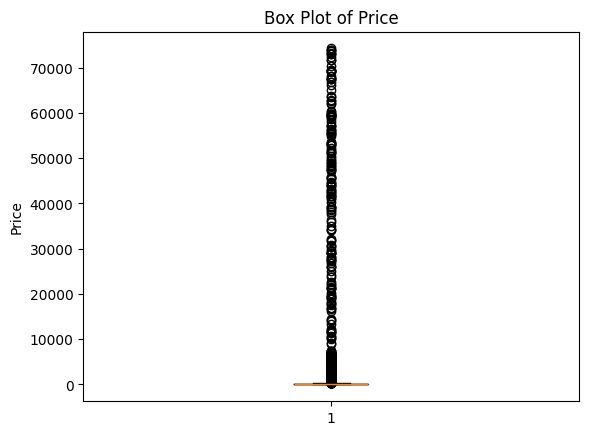

In [5]:
plt.boxplot(df['Price Per Unit'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()


In [6]:
# Calculate Q1, Q3, dan IQR
Q1 = df['Price Per Unit'].quantile(0.25)  # Kuartil Pertama (25%)
Q3 = df['Price Per Unit'].quantile(0.75)  # Kuartil Ketiga (75%)
IQR = Q3 - Q1                   # Interquartile Range
# Tentukan batas outlier
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify Outliers
outliers = df[(df['Price Per Unit'] < lower_bound) | (df['Price Per Unit'] > upper_bound)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("Outliers:")
print(outliers)

Q1: 12.96
Q3: 177.58749999999998
IQR: 164.62749999999997
Lower Bound: -233.98124999999996
Upper Bound: 424.52874999999995
Outliers:
     Customer ID               Category          Item  Quantity  \
8      CUST_0116                 Travel  Plane Ticket         1   
16     CUST_0065               Shopping           Car         4   
36     CUST_0073               Shopping           Car         1   
40     CUST_0043         Medical/Dental  Doctor Visit         1   
46     CUST_0024                 Travel  Plane Ticket         1   
...          ...                    ...           ...       ...   
9974   CUST_0168  Housing and Utilities          Rent         1   
9980   CUST_0140  Housing and Utilities          Rent         1   
9981   CUST_0064               Shopping   Electronics         3   
9986   CUST_0050               Shopping           Car         1   
9997   CUST_0122               Shopping   Electronics         1   

      Price Per Unit  Total Spent  Payment Method    Location  

<strong>In this case, I would not remove the outlier because it has an important insight and its existence still makes sense.<strong/><br/>
<p>These outliers or extreme values ​​are not errors because the price per unit, for example, for a car item is definitely very different from the others<p/>

#### 2. Data Preprocessing

In [4]:
df.isnull().sum()

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [5]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Customer ID, Category, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


In [6]:
df.dtypes

Customer ID          object
Category             object
Item                 object
Quantity              int64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object

#### 3. Exploratory Data Analysis (EDA)

In [9]:
df.describe(include='all')

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000
unique,200,13,48,NaN,NaN,NaN,4,3,744
top,CUST_0142,Groceries,Dentist Visit,NaN,NaN,NaN,Digital Wallet,In-store,2023-12-29
freq,72,799,278,NaN,NaN,NaN,2560,3387,28
mean,NaN,NaN,NaN,2.237200,969.957948,2534.750890,NaN,NaN,NaN
std,NaN,NaN,NaN,1.481133,6104.403843,19676.741772,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.110000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,12.960000,25.957500,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,51.860000,88.115000,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,177.587500,336.375000,NaN,NaN,NaN


##### 1. Purchase Frequency

In [12]:
# Pivot Data
pivot_data = df.pivot_table(values="Quantity", index="Category", columns="Item", aggfunc="sum", fill_value=0)

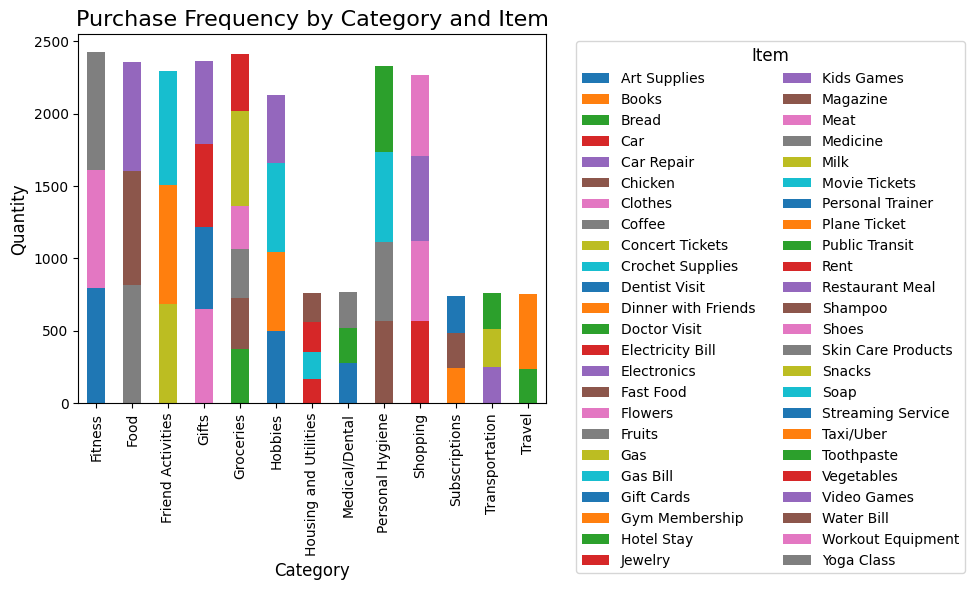

In [20]:
# Plot stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Purchase Frequency by Category and Item", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, title_fontsize=12, ncol=2)
plt.tight_layout()
plt.show()

In [21]:
# Total Quantity per Category
category_summary = df.groupby("Category")["Quantity"].sum().reset_index()
# Total Quantity per Item
item_summary = df.groupby("Item")["Quantity"].sum().reset_index()

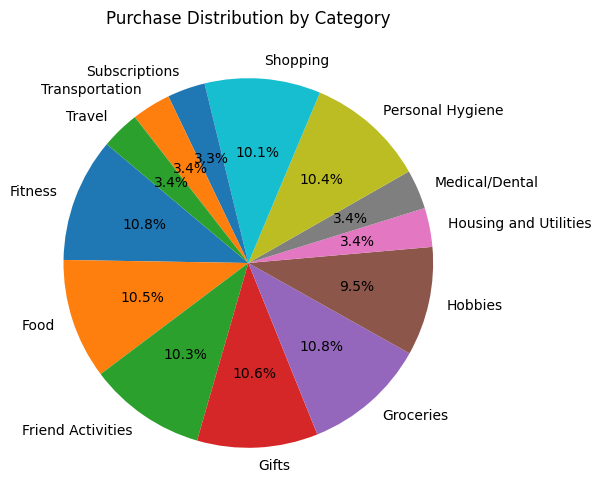

In [22]:
# Plot
plt.figure(figsize=(8, 6))
plt.pie(category_summary["Quantity"], labels=category_summary["Category"], autopct='%1.1f%%', startangle=140)
plt.title("Purchase Distribution by Category")
plt.show()

##### 2. Frequently purchased products

In [23]:
# Calculate total purchases per item
item_summary = df.groupby("Item")["Quantity"].sum().reset_index()
# Sort by number of purchases (descending)
item_summary = item_summary.sort_values(by="Quantity", ascending=False)
# Top 10 frequently purchased products
print(item_summary.head(10))

                   Item  Quantity
11  Dinner with Friends       823
47           Yoga Class       819
7                Coffee       815
46    Workout Equipment       813
30     Personal Trainer       795
29        Movie Tickets       787
15            Fast Food       787
34      Restaurant Meal       753
8       Concert Tickets       686
16              Flowers       651


##### 3. Average amount spent

In [25]:
# Average Amount Spent per Category
avg_spent_category = df.groupby("Category")["Total Spent"].mean().reset_index()
# Average Amount Spent per Item
avg_spent_item = df.groupby("Item")["Total Spent"].mean().reset_index()

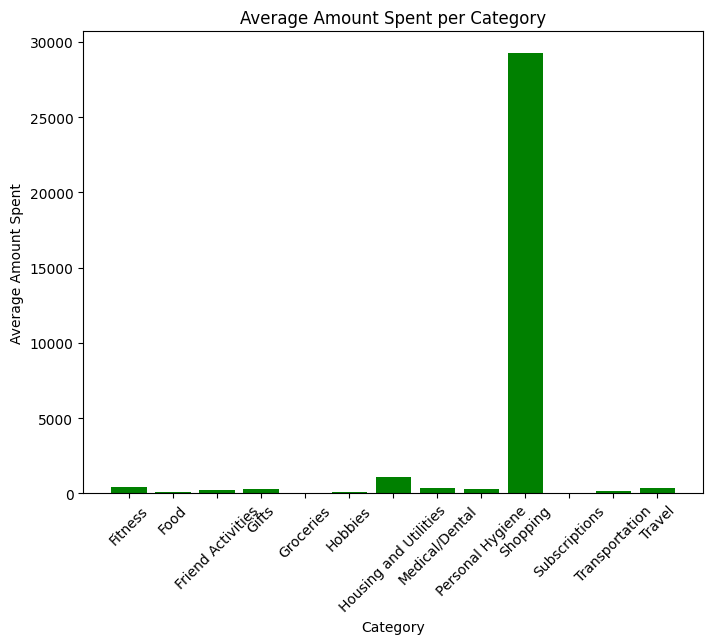

In [26]:
# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_spent_category["Category"], avg_spent_category["Total Spent"], color="green")
plt.title("Average Amount Spent per Category")
plt.xlabel("Category")
plt.ylabel("Average Amount Spent")
plt.xticks(rotation=45)
plt.show()

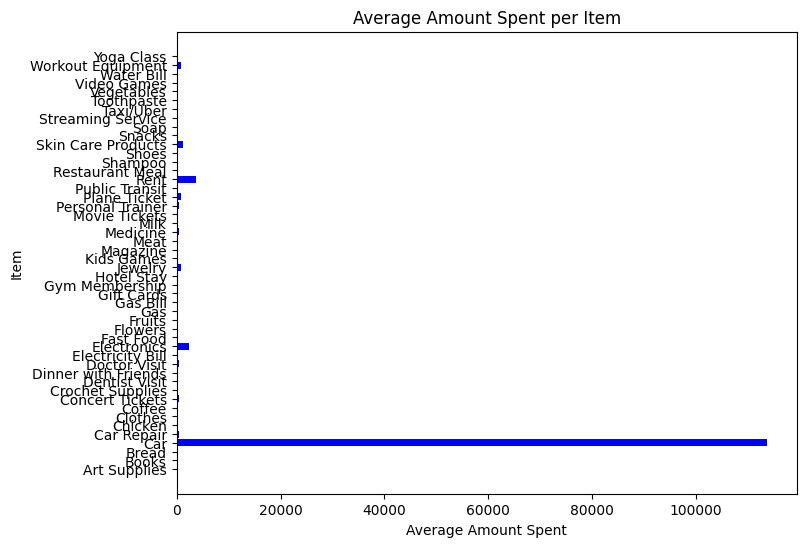

In [27]:
# Horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(avg_spent_item["Item"], avg_spent_item["Total Spent"], color="blue")
plt.title("Average Amount Spent per Item")
plt.xlabel("Average Amount Spent")
plt.ylabel("Item")
plt.show()

In [34]:
# Filter item di kategori 'Clothing'
shopping_items = df.loc[df["Category"] == "Shopping"]
shopping_items

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
16,CUST_0065,Shopping,Car,4,59807.04,239228.17,Digital Wallet,In-store,2023-11-27
17,CUST_0136,Shopping,Shoes,1,122.22,122.22,Cash,In-store,2023-11-29
20,CUST_0041,Shopping,Clothes,3,37.80,113.40,Credit Card,Online,2024-11-06
30,CUST_0180,Shopping,Shoes,2,101.80,203.60,Credit Card,Mobile App,2024-06-13
36,CUST_0073,Shopping,Car,1,48275.65,48275.65,Debit Card,In-store,2023-09-30
...,...,...,...,...,...,...,...,...,...
9954,CUST_0147,Shopping,Car,1,52249.94,52249.94,Debit Card,Online,2024-07-07
9977,CUST_0153,Shopping,Shoes,3,61.20,183.59,Credit Card,Online,2023-04-22
9981,CUST_0064,Shopping,Electronics,3,652.09,1956.28,Cash,Online,2024-05-13
9986,CUST_0050,Shopping,Car,1,7477.15,7477.15,Digital Wallet,Mobile App,2025-01-04


##### 4. How items or categories relate to locations or payment methods

<strong>From the descriptive analysis that has been carried out, is there anything to do with Payment Method or Location which influences both each category and each product or item?<strong/>

##### 1. Categories

From the purchase frequency by category which can be seen using both a bar chart and a pie chart, it is clearly divided into two parts, namely high and low. Then I will test whether there is a correlation between location and payment method.

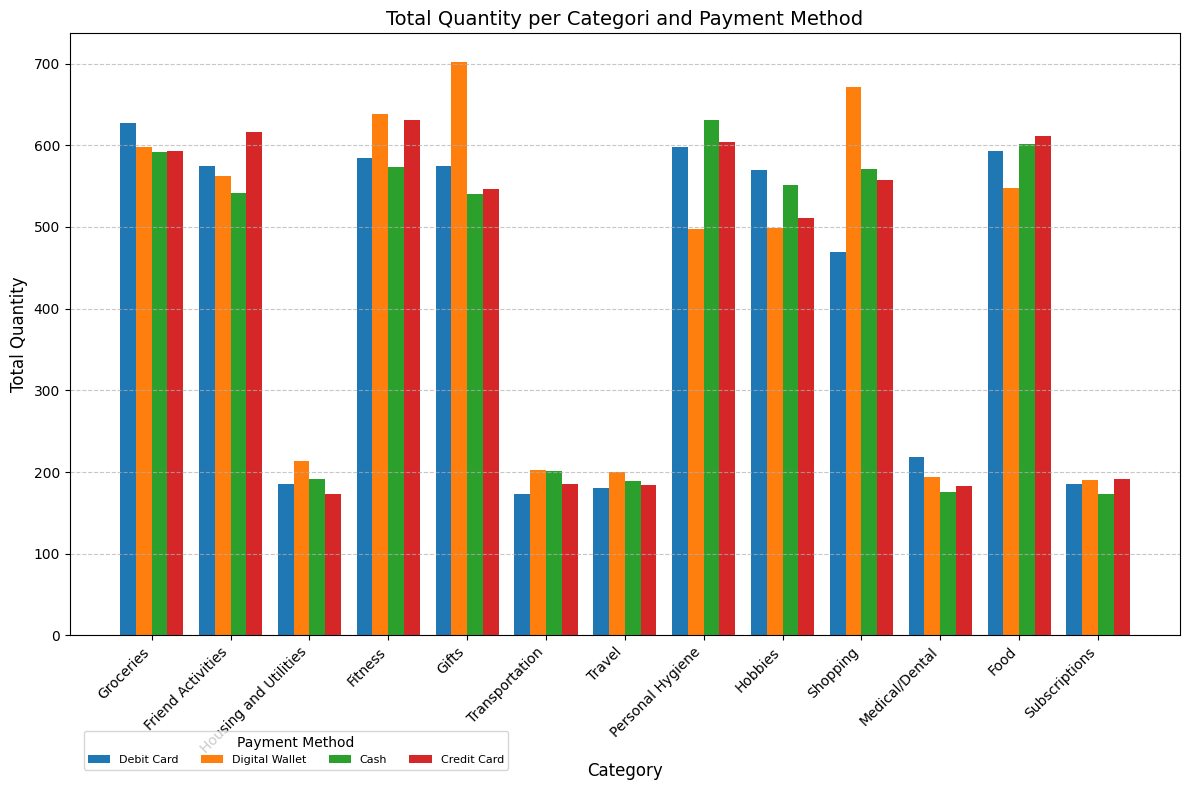

In [34]:
# Define unique payment categories and methods
categories = df['Category'].unique()
payment_methods = df['Payment Method'].unique()

# Aggregation of amounts per category and payment method
aggregated_data = df.groupby(['Category', 'Payment Method'])['Quantity'].sum().reset_index()

# Determine the bar position for each category
x = np.arange(len(categories))  # Lokasi kategori
bar_width = 0.2  # Lebar bar

# Plot data
fig, ax = plt.subplots(figsize=(12, 8))

for i, method in enumerate(payment_methods):
    bar_positions = x + i * bar_width
    values = [
        aggregated_data[(aggregated_data['Category'] == category) & (aggregated_data['Payment Method'] == method)]['Quantity'].sum()
        for category in categories
    ]
    ax.bar(bar_positions, values, bar_width, label=method)

# Customize axes and labels
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Total Quantity', fontsize=12)
ax.set_title('Total Quantity per Categori and Payment Method', fontsize=14)
ax.set_xticks(x + bar_width * (len(payment_methods) - 1) / 2)
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax.legend(title='Payment Method', fontsize=8, loc='upper right', bbox_to_anchor=(0.4, -0.15), ncol=len(payment_methods))

# Add a grid for easier reading
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Displays graphics
plt.tight_layout()
plt.show()